In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP13 : COURBES ELLIPTIQUES                                                  #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


# *************************************************************************** #
# *************************************************************************** #
# TP13 : COURBES ELLIPTIQUES                                                  #
# *************************************************************************** #
# *************************************************************************** #



In [38]:
reset()
print("""\
# ****************************************************************************
# ADDITION DANS UNE COURBE ELLIPTIQUE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

p = 61
Fp = FiniteField(p)
E = EllipticCurve(Fp,[1,0])
P = E.random_point()
Q = E.random_point()

# Code pour l'EXERCICE

n = 100

def addition(P,Q):
    E = P.curve()
    Fp = E.base_ring()
    a = E.a4()
    b = E.a6()
    alpha = 1
    if P == Q:
        if P[1] == 0:
            return E(0,1,0) # renvoie le point à l'infini
        else:
            alpha = (3*P[0]^2 + a)/(2*P[1])
    else:
        alpha = (Q[1]-P[1])/(Q[0]-P[0])
    
    xr = alpha^2-P[0]-Q[0]
    yr = -P[1] + alpha*(P[0]-xr)
    return E(xr,yr,1)

# # Affichage des resultats
print("Vérification de l'addition", addition(P,Q)==P+Q)


# ****************************************************************************
# ADDITION DANS UNE COURBE ELLIPTIQUE
# ****************************************************************************

Vérification de l'addition True


In [49]:
reset()
print("""\
# ****************************************************************************
# COURBE DE L'ANSSI
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


# Code pour l'EXERCICE

ANSSI = "Agence Nationale de la Sécurité des Systèmes d'Information"
p = 0xf1fd178c0b3ad58f10126de8ce42435b3961adbcabc8ca6de8fcf353d86e9c03
a = 0xf1fd178c0b3ad58f10126de8ce42435b3961adbcabc8ca6de8fcf353d86e9c00
b = 0xee353fca5428a9300d4aba754a44c00fdfec0c9ae4b1a1803075ed967b7bb73f
ordre = 0xf1fd178c0b3ad58f10126de8ce42435b53dc67e140d2bf941ffdd459c6d655e1
E = EllipticCurve(FiniteField(p),[a,b])
nb_operation = float(sqrt(ordre))
securite = 0
while 2^(securite) < nb_operation:
    securite = securite + 1


# # Affichage des resultats

print( "ANSSI signifie :",ANSSI)
print( "La taille de p est de 256 bits.")
print("La courbe recommandée est")
print(E)
print("L'ordre de la courbe est : ", ordre)
print("p est premier : ",p.is_prime())
print("A priori, le calcul du logarithme discret pour le groupe défini par la courbe demande", nb_operation , "opérations.")
print("La securité est alors de : ", securite, " bits")




# ****************************************************************************
# COURBE DE L'ANSSI
# ****************************************************************************

ANSSI signifie : Agence Nationale de la Sécurité des Systèmes d'Information
La taille de p est de 256 bits.
La courbe recommandée est
Elliptic Curve defined by y^2 = x^3 + 109454571331697278617670725030735128145969349647868738157201323556196022393856*x + 107744541122042688792155207242782455150382764043089114141096634497567301547839 over Finite Field of size 109454571331697278617670725030735128145969349647868738157201323556196022393859
L'ordre de la courbe est :  109454571331697278617670725030735128146004546811402412653072203207726079563233
p est premier :  True
A priori, le calcul du logarithme discret pour le groupe défini par la courbe demande 3.3083919255689355e+38 opérations.
La securité est alors de :  128  bits


# ****************************************************************************
# COMPTAGE DE POINTS
# ****************************************************************************

On a le même résultat que Sage avec notre fonction naive :  True
5. Il semblerait qu'il y ait moins de courbes de cardinal impair, ce qui se traduit par la forme des diagrammes.
6. On peut remarquer que l'addition des cardinaux semble être toujours paire :  4008


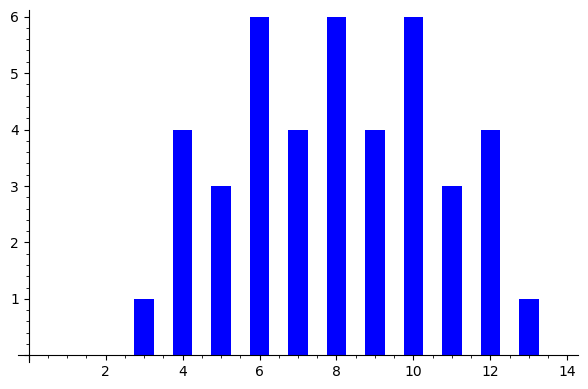

In [15]:
reset()
print("""\
# ****************************************************************************
# COMPTAGE DE POINTS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

p = 2003
Fp = FiniteField(p)
a = 1929
b = 1178

while true:
    d=Fp.random_element()
    if not d.is_square():
        break



# Code pour l'EXERCICE

def comptage(a,b):
    Pol.<X> = PolynomialRing(Fp)
    point = set()
    for y in Fp:
        fy = y^2 - X^3 - a*X - b
        for x in fy.roots():
            point.add((x[0],y))
    
    return len(point) + 1

q = 7
F = FiniteField(q)
frequence = [0 for i in range(q+1+2*ceil(sqrt(q)))]
for A in F:
    for B in F:
        if 4*A^3 + 27*B^2 != F(0):# on vérifie que E_ab est bien une courbe lisse.
            frequence[EllipticCurve(F,[A,B]).cardinality()] += 1

# # Affichage des resultats

print("On a le même résultat que Sage avec notre fonction naive : ", EllipticCurve(Fp,[a,b]).cardinality() == comptage(a,b))
print("5. Il semblerait qu'il y ait moins de courbes de cardinal impair, ce qui se traduit par la forme des diagrammes.")
print("6. On peut remarquer que l'addition des cardinaux semble être toujours paire : ", EllipticCurve(Fp,[a,b]).cardinality() + EllipticCurve(Fp,[a*d^2,b*d^3]).cardinality())
bar_chart(frequence)


In [18]:
reset()
print("""\
# ****************************************************************************
# FACTORISATION ECM
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

class FoundFactor(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

n = 2020

# Code pour l'EXERCICE

def division(x,y):
    n = y.modulus()
    if y == 0:
        raise ZeroDivisionError
        return
    if gcd(y,n) != 1:
        raise FoundFactor(y)
        return
    return x/y

def addition(P,Q):
    E = P.curve()
    Fp = E.base_ring()
    a = E.a4()
    b = E.a6()
    alpha = 1
    if P == Q:
        if P[1] == 0:
            return E(0,1,0) # renvoie le point à l'infini
        else:
            alpha = division(3*P[0]^2 + a,2*P[1])
    else:
        alpha = division(Q[1]-P[1],Q[0]-P[0])
    
    xr = alpha^2-P[0]-Q[0]
    yr = -P[1] + alpha*(P[0]-xr)
    return E(xr,yr,1) 
    
def multiplication(lamb,P): 
    E = P.curve()
    if lamb == 0:
        return E(0,1,0)
    elif lamb == 1:
        return P
    elif lamb%2 == 0:
        return (lamb/2)*(addition(P,P))
    return addition(P,((lamb-1)/2)*(addition(P,P)))

def ECM(n,B):
    Zn = Zmod(n)
    a = Zn.random_element()
    x0 = Zn.random_element()
    y0 = Zn.random_element()
    b = y0^2 - x0^3 - a*x0
    g = gcd(4*a^3+27*b^2,n)
    if 1<g<n:
        return g
    if g == n:
        return None
    E = EllipticCurve(Zn,[a,b])
    A = E(x0,y0)
    for p in Primes(B) :
        e = 1
        while p^e <= B :
            e+=1
        try :
            A = multiplication(p^e,A)
        except FoundFactor as ex :
            factor = ex.value
            return gcd(factor,n)   
    return None


# # Affichage des resultats

ECM(n,15)



# ****************************************************************************
# FACTORISATION ECM
# ****************************************************************************



4

In [19]:
# ****************************************************************************
# COURBE D'EDWARDS
# ****************************************************************************



# Code pour l'EXERCICE

reponse = "Une attaque par canaux auxiliaires peut profiter des disjonctions de cas pour les additions afin de deviner qu'un point Q est égal à un point P. L'avantage des courbes d'Edwards est que la somme ne dépend pas de si P = Q, dans ce cas l'attaque étudié par canaux auxilliaires est rendue inefficace."

# # Affichage des resultats

print(reponse)


Une attaque par canaux auxiliaires peut profiter des disjonctions de cas pour les additions afin de deviner qu'un point Q est égal à un point P. L'avantage des courbes d'Edwards est que la somme ne dépend pas de si P = Q, dans ce cas l'attaque étudié par canaux auxilliaires est rendue inefficace.
